# Naive Bayes
* Naive Bayes is a classification algorithm based on Bayes' theorem.
* which is a probablity theory that describes the probablity of an event, based on prior knowledge of conditions that might be related to the event.
* **Naive**: It is called Naive Because it assumes that the occurrence of a certian feature is independent of the occurrence of other features.
* **Bayes**: It is called Bayes because it depends on the principle of Bayes' theorem.

## Bayes' Theorem
* Bayes' Theorem is also known as Bayes' rle or Bayes's law, which is used to determine the probablity of a hypothesis with prior knowledge. It depends on hte conditional probability.
* formula:
<br>
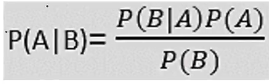

* where:
    * P(A/B) is Posterior probability: Probablity of hypothesis A on the oberved event B.
    * P(B/A) is Linkelihood probablity: Probablity of the evidence given that the probablity of a hypothesis is true.
    * P(A) is Prior probablity: Probablity of hypothesis before observing the evidence.
    * P(B) is Marginal probablity: Probablity of Evidence.

## Types of Naive Bayes Model:
* There are three types of Naive Bayes Model, which are given below:
    * Gaussian
    * Multinomial
    * Bernoulli
<br>
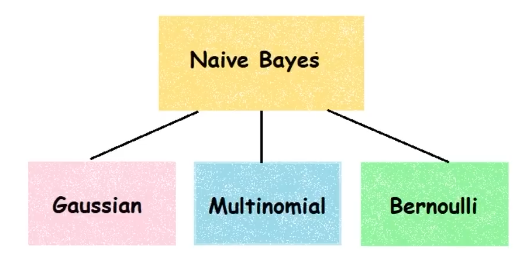

### Gaussian Naive Bayes:
* Assumes that continuous features follow a Gaussian (normal) distribution.
* Suitable for features that are continuous and have a normal distribution.

### Bernoulli Naive Bayes:
* Assumes that features are binary (Boolean) variables.
* Suitable for data that can be represented as binary features, such as documents classification problem where each term is either present or absent.

### Multinomial Naive Bayes:
* Assumes that features follow a multinomial distribution.
* Typically used for discrete data, such as text data, where each feature represents the frequency of a term.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('../../dataset/Social_Network_Ads.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
df.drop(columns=['User ID','Gender'],inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [15]:
df.columns = [i.lower() for i in df.columns]

In [22]:
df.rename(columns={'estimatedsalary':'salary'},inplace=True)

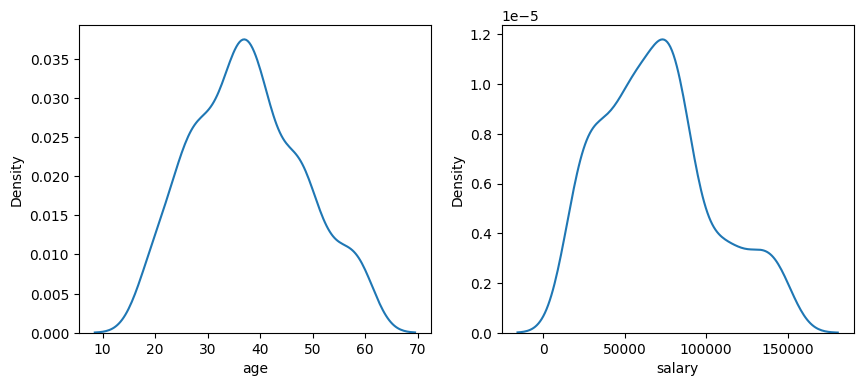

In [28]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(df['age'])
plt.subplot(1,2,2)
sns.kdeplot(df['salary'])
plt.show()

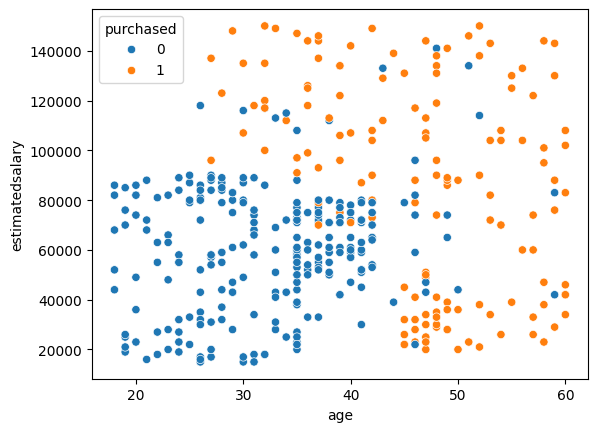

In [16]:
sns.scatterplot(x=df['age'],y=df['estimatedsalary'],hue=df['purchased'])
plt.show()

In [18]:
x = df.drop(columns=['purchased'])
y = df['purchased']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [29]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

### Gaussian Naive Bayes

In [30]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [35]:
gnb.score(x_test,y_test), gnb.score(x_train,y_train)

(0.925, 0.8625)

e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


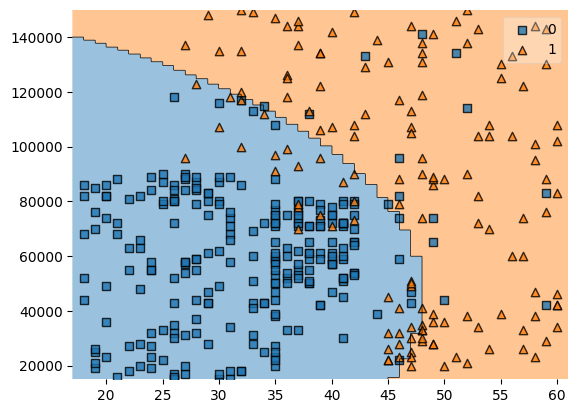

In [39]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=gnb)
plt.show()

### Multinomial Naive Bayes

In [33]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [36]:
mnb.score(x_test,y_test), mnb.score(x_train,y_train)

(0.6, 0.653125)

e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


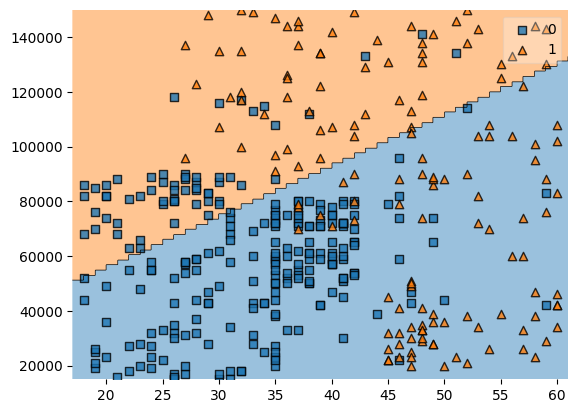

In [41]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=mnb)
plt.show()

### Bernoulli Naive Bayes

In [37]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [38]:
bnb.score(x_test,y_test), bnb.score(x_train,y_train)

(0.65, 0.640625)

e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


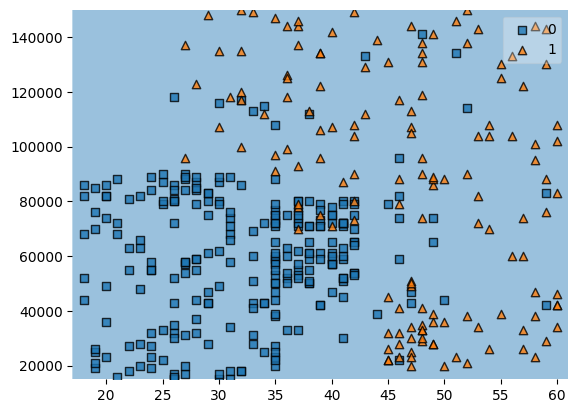

In [42]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=bnb)
plt.show()